# Planecrash Database
http://www.planecrashinfo.com/database.htm

### Get the Data

In [1]:
project_path = r"d:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project"

%cd $project_path

D:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project


In [2]:
!dir

 Volume in drive D is Documents
 Volume Serial Number is 8DBE-F730

 Directory of D:\Projects\ExperisAcademy\Exercises\pandas\kaggle_mini_project

15.12.2019  14:13    <DIR>          .
15.12.2019  14:13    <DIR>          ..
15.12.2019  11:55    <DIR>          .ipynb_checkpoints
15.12.2019  09:16    <DIR>          data
15.12.2019  14:13            54,486 plane_crashes.ipynb
               1 File(s)         54,486 bytes
               4 Dir(s)  39,309,037,568 bytes free


In [3]:
import pandas as pd
import numpy as np

In [4]:
# Define date parser to convert date records into pandas format:
date_parser = lambda d: pd.datetime.strptime(d, '%B %d, %Y')

# Read the file and show first 3 records:
raw_df = pd.read_csv('data\plane-crash.csv', delimiter=',', na_values='?', parse_dates=['date'], date_parser=date_parser)

# Show firts 3 records:
raw_df.head(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2 (passengers:1 crew:1),1 (passengers:1 crew:0),0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1 (passengers:0 crew:1),1 (passengers:0 crew:0),0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5 (passengers:0 crew:5),5 (passengers:0 crew:5),0.0,First U.S. dirigible Akron exploded just offsh...


In [5]:
# Show last 3 records:
raw_df.tail(3)

,date,time,location,operator,flight_no,route,ac_type,registration,cn_ln,aboard,fatalities,ground,summary
5780,2018-09-28,1010,"Chuuk, Micronesia",Air Niugini,NaN,Pohnpei - Chuuk,Boeing 737-8BK,P2-PXE,33024/1688,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...
5781,2018-10-29,0631,"Off Jakarta, Indonesia",Lion Air,610,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,PK-LQP,43000/7058,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ..."
5782,2018-11-06,0253,"Georgetown, Guyana",Fly Jamaica Airways,NaN,Georgetown - Toronto,Boeing 757-N23,N524AT,30233/895,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ..."


In [6]:
# Print general information about the dataset:
print(f"Number of records:\t{raw_df.shape[0]}")
print(f"Number of features:\t{raw_df.shape[1]}")
print('\nGeneral information about dataset:')
print(raw_df.info())

Number of records:	5783
Number of features:	13

General information about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 13 columns):
date            5783 non-null datetime64[ns]
time            3675 non-null object
location        5777 non-null object
operator        5762 non-null object
flight_no       1347 non-null object
route           4289 non-null object
ac_type         5759 non-null object
registration    5431 non-null object
cn_ln           4576 non-null object
aboard          5783 non-null object
fatalities      5783 non-null object
ground          5731 non-null float64
summary         5552 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 587.4+ KB
None


### Data cleaning and Transformation

In [7]:
# Make a copy of the dataframe for proccessing (the raw dataframe isn't large, make the full copy)
df = raw_df.copy()

# Drop unimportant features:
df.drop(columns=['registration','cn_ln', 'flight_no'], inplace=True)

# Show last 3 records of the new dataframe:
df.tail(3)

,date,time,location,operator,route,ac_type,aboard,fatalities,ground,summary
5780,2018-09-28,1010,"Chuuk, Micronesia",Air Niugini,Pohnpei - Chuuk,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...
5781,2018-10-29,0631,"Off Jakarta, Indonesia",Lion Air,Jakarta - Pangkal Pinang,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ..."
5782,2018-11-06,0253,"Georgetown, Guyana",Fly Jamaica Airways,Georgetown - Toronto,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ..."


#### Parse time info

In [8]:
# Examine 5 first and 5 last time records:
print(df.time.head())
print(df.time.tail())

0      17:18
1        NaN
2      06:30
3        NaN
4    c 18:30
Name: time, dtype: object
5778    0744
5779    1655
5780    1010
5781    0631
5782    0253
Name: time, dtype: object


As we can see, time data was saved in two formats: HH:MM and HHMM. Lets parse it

In [9]:
import re
import datetime as dt


def parse_time(t):
    try:
        result = re.search(pattern=r"(\d{2}):?(\d{2})", string=t).groups()
        return dt.time(int(result[0]), int(result[1]))
    except (AttributeError, TypeError):
        return np.nan

In [10]:
# Parse time feature and save the result as a new feature (to explore unparsed values):
df['crash_time'] = raw_df['time'].apply(parse_time)

# Show first 5 records:
df[['time','crash_time']].head()

,time,crash_time
0,17:18,17:18:00
1,NaN,NaN
2,06:30,06:30:00
3,NaN,NaN
4,c 18:30,18:30:00


In [11]:
# Show last 5 records:
df[['time','crash_time']].tail()

,time,crash_time
5778,0744,07:44:00
5779,1655,16:55:00
5780,1010,10:10:00
5781,0631,06:31:00
5782,0253,02:53:00


In [12]:
# Show records that weren't parsed to the right format:
df.loc[df['crash_time'].isna(), 'time'].dropna()

156      c 9:15
237     c: 2:00
356      c 0:30
398     c 10;00
549     c 13;00
552       14;10
644     c 12;30
759        1:30
848       06;15
933       23;00
1017      12;00
1299       0:00
1846      12"20
2102      18.40
3382      07;15
3791       1:00
4509       2:40
5044      22"08
5053    c: 9:40
5063       2:00
5064       8:02
5249      16;30
5334      16;30
5376       9:30
5582      0:900
Name: time, dtype: object

In [13]:
# redefine parser function and apply in again to process all the values:
def parse_time(t):
    try:
        result = re.search(pattern=r"(\d{1,2})[:;\"\.]?(\d{2})", string=t).groups()
        return dt.time(int(result[0]), int(result[1]))
    except (AttributeError, TypeError, ValueError):
        return np.nan
                           

# Parse time feature and save the result as a new feature (to explore unparsed values):
df['crash_time'] = raw_df['time'].apply(parse_time)

# Show first 5 records:
df[['time','crash_time']].head()

,time,crash_time
0,17:18,17:18:00
1,NaN,NaN
2,06:30,06:30:00
3,NaN,NaN
4,c 18:30,18:30:00


In [14]:
# Show records that weren't parsed to the right format:
df.loc[df['crash_time'].isna(), 'time'].dropna()

5582    0:900
Name: time, dtype: object

In [15]:
# Manualy parse the last record:
df.loc[5582, 'crash_time'] = dt.time(9, 0)

In [16]:
# After we finished parsing time data, we can drop this column:
df.drop(columns=['time'], inplace=True)

#### Parse Route info

In [17]:
print(f"Total number of records:\t{df.shape[0]:,.0f}")
print(f"Records with 'Route' info:\t{df.route.notna().sum():,.0f}")

Total number of records:	5,783
Records with 'Route' info:	4,289


In [18]:
# Show some route records:
df['route'].sample(n=20, random_state=0)

3862                                     NaN
2812             Knoxville, TN - Andrews, NC
5105                                     NaN
3501              Muskegon, MI - Pontiac, MI
1161                            Cairo - Rome
2475                         Warsaw - Cracow
286     Santiago, Chile - Mendosa, Argentina
1511                                     NaN
3996                   Guangzhou - Hong Kong
4782                           Tefe - Manaus
379                          Helena - Denver
3370                                Training
4959                     Deadhorse - Nuiqsut
661                                      NaN
2996             Lawton, OK - Huntsville, TX
4988                   Bangkok - Chiang Mai.
3935                         Pucallpa - Lima
863                          Islay - Glascow
678                                      NaN
4330            La Paz - Santa Ana de Yacuma
Name: route, dtype: object

In [19]:
# Create regex pattern to separate "from" - "to" destinations:
route_pattern = r"(?P<from>[\w\s]+)\s?[-–]+s?(?P<to>[\w\s]+)"

# Parse route column and add results as new features:
df[['from','to']] = raw_df.route.str.extract(route_pattern, expand=True)

# Show some resulst:
df[['route', 'from', 'to']].sample(n=20, random_state=0)

,route,from,to
3862,NaN,NaN,NaN
2812,"Knoxville, TN - Andrews, NC",TN,Andrews
5105,NaN,NaN,NaN
3501,"Muskegon, MI - Pontiac, MI",MI,Pontiac
1161,Cairo - Rome,Cairo,Rome
2475,Warsaw - Cracow,Warsaw,Cracow
286,"Santiago, Chile - Mendosa, Argentina",Chile,Mendosa
1511,NaN,NaN,NaN
3996,Guangzhou - Hong Kong,Guangzhou,Hong Kong
4782,Tefe - Manaus,Tefe,Manaus


In [20]:
# "pd.Series.str.extract" method doesn't strip leading and ending spaces:
print(f"records with leading spaces:\t{df.to.str.startswith(' ').sum()}")

records with leading spaces:	3966


In [21]:
# Strip all useless symbols:
df.loc[:, 'from'] = df['from'].str.strip()
df.loc[:, 'to'] = df['to'].str.strip()

In [22]:
print(f"Accindents with parsed route info:\t{df['from'].notna().sum():,.0f}")

Accindents with parsed route info:	4,029


In [23]:
# Check unparsed records:
df.route[df.to.isna()].value_counts().head(10)

Training             95
Sightseeing          42
Test flight          20
Test                  7
Demonstration         3
Positioning           3
Parachuting           3
Skydiving             3
Otis AFB              3
Training exercise     2
Name: route, dtype: int64

There are 260 records that weren't parsed, but most of them don't contain any valueable info, so now we can drop this feature

In [24]:
# Drop parsed feature:
df.drop(columns=['route'], inplace=True)

# Show some results:
df.tail(3)

,date,location,operator,ac_type,aboard,fatalities,ground,summary,crash_time,from,to
5780,2018-09-28,"Chuuk, Micronesia",Air Niugini,Boeing 737-8BK,47 (passengers:35 crew:12),1 (passengers:1 crew:0),0.0,The aircraft was approaching for a landing at ...,10:10:00,Pohnpei,Chuuk
5781,2018-10-29,"Off Jakarta, Indonesia",Lion Air,Boeing 737-MAX 8,189 (passengers:181 crew:8),189 (passengers:181 crew:8),0.0,"The airliner crashed into the Jakarta Sea, 13 ...",06:31:00,Jakarta,Pangkal Pinang
5782,2018-11-06,"Georgetown, Guyana",Fly Jamaica Airways,Boeing 757-N23,128 (passengers:120 crew:8),1 (passengers:1 crew:0),0.0,"After taking off and reaching FL200, the crew ...",02:53:00,Georgetown,Toronto


#### Parse airplane info

In [25]:
# Show number of unique values for ac_type feature:
print(f"Number of unique plane models:\t{df['ac_type'].nunique()}")

Number of unique plane models:	2741


In [26]:
# Show unique ac_type values and how often they appear in the dataset:
df['ac_type'].value_counts()

Douglas DC-3                                341
de Havilland Canada DHC-6 Twin Otter 300     86
Douglas C-47A                                74
Douglas C-47                                 67
Douglas DC-4                                 41
Yakovlev YAK-40                              37
Antonov AN-26                                36
Junkers JU-52/3m                             32
Douglas C-47B                                29
Cessna 208B Grand Caravan                    29
Douglas DC-6B                                28
De Havilland DH-4                            27
Curtiss C-46A                                21
Douglas DC-6                                 21
Breguet 14                                   21
Curtiss C-46                                 20
Antonov AN-24                                19
McDonnell Douglas DC-9-32                    19
Douglas C-47-DL                              19
Embraer 110P1 Bandeirante                    18
Antonov AN-12                           

There are many plane manufacturer names, some of them consist of two or more words, but it seems that there is no company with name shorter than 3 letters. We will try to use it during the parsing

In [27]:
# Create regex pattern that would extract one word if it is longer than 2 letters, or 2 words otherwise:
ac_type_pattern = r"^([a-zA-Z\s-]{3,}?)\s"


# Define parser function that tries to find a manufacturer name and if it fails than returns the original value:
def parse_ac_type(rec):
    try:
        result = re.search(pattern=ac_type_pattern, string=rec).group().strip().lower()
        return result
    except (AttributeError, TypeError, ValueError):
        return rec

In [28]:
# Parse the ac_type column and save it as a new feature:
df['plane_manufacturer'] = df['ac_type'].apply(parse_ac_type)

# Now show unique manufacturers and in how many incidents their planes where involved:
df['plane_manufacturer'].value_counts()

douglas                          1013
boeing                            407
lockheed                          362
de havilland                      321
cessna                            318
antonov                           289
ilyushin                          145
fokker                            139
piper                             138
beechcraft                        129
mcdonnell                         127
curtiss                           126
tupolev                           109
vickers                            95
convair                            89
junkers                            88
fairchild                          78
britten-norman                     68
bell                               67
embraer                            66
sikorsky                           55
yakovlev                           52
learjet                            51
avro                               50
consolidated                       46
airbus                             45
let         

#### Extract info about people aboard and victims

In [29]:
# Create regex pattern to exctract info about passangers and crew casualties:
fatalities_pattern = r"(?:passengers):(?P<passengers>\d+)\s*(?:crew):(?P<crew>\d+)"

# Extract required info and save it as new features:
df[['fatalities_p', 'fatalities_c']] = df.fatalities.str.extract(pat = fatalities_pattern)
df[['aboard_p', 'aboard_c']] = df.aboard.str.extract(pat = fatalities_pattern)

# Convert new features to float format:
df.iloc[:, -4:] = df.iloc[:, -4:].astype('float')

# Show several random records:
df.sample(n=10, random_state=0)

,date,location,operator,ac_type,aboard,fatalities,ground,summary,crash_time,from,to,plane_manufacturer,fatalities_p,fatalities_c,aboard_p,aboard_c
3862,1986-10-30,"Near Managua, Nicaragua",Military - Nicaraguan Air Force,Mil Mi-17 (helicopter),23 (passengers:20 crew:3),21 (passengers:19 crew:2),0.0,"Either mechanical failure, weather or ground f...",17:00:00,NaN,NaN,mil,19.0,2.0,20.0,3.0
2812,1973-01-27,"Townsend, Tennessee",Air Transit - Air Taxi,Cessna 182B,4 (passengers:3 crew:1),3 (passengers:2 crew:1),0.0,Collided with trees in fog and low ceiling. Co...,13:00:00,TN,Andrews,cessna,2.0,1.0,3.0,1.0
5105,2002-10-07,"Santa Cruz do Sul, Brazil",American Virginia,Learjet 60,5 (passengers:2 crew:3),1 (passengers:0 crew:1),0.0,The crew was not able to stop the plane on the...,09:10:00,NaN,NaN,learjet,0.0,1.0,2.0,3.0
3501,1981-06-30,"Muskegon, Michigan",G & W Aviation,Cessna 401,5 (passengers:4 crew:1),5 (passengers:4 crew:1),0.0,The aircraft experienced engine failure on tak...,18:11:00,MI,Pontiac,cessna,4.0,1.0,4.0,1.0
1161,1950-08-31,"Near Wadi Natrun, Egypt",Trans World Airlines,Lockheed 749A Constellation,55 (passengers:48 crew:7),55 (passengers:48 crew:7),0.0,"While en route from Cairo to Rome, witnesses o...",00:03:00,Cairo,Rome,lockheed,48.0,7.0,48.0,7.0
2475,1969-04-02,"Zawoja, Poland",LOT Polish Airlines,Antonov AN-24V,53 (passengers:48 crew:5),53 (passengers:48 crew:5),0.0,The aircraft was on a flight from Warsaw to Cr...,16:08:00,Warsaw,Cracow,antonov,48.0,5.0,48.0,5.0
286,1932-07-16,"Mount El Plomo, near Vitacura, Chile",Panagra,Ford 5-AT-C Tri Motor,9 (passengers:6 crew:3),9 (passengers:6 crew:3),0.0,The aircraft crashed in a severe snowstorm in ...,08:00:00,Chile,Mendosa,ford,6.0,3.0,6.0,3.0
1511,1955-12-01,"Belem, Brazil",Cruzeiro,Douglas DC-3,6 (passengers:4 crew:2),6 (passengers:4 crew:2),0.0,"Shortly after taking off, the No.1 engine lost...",02:00:00,NaN,NaN,douglas,4.0,2.0,4.0,2.0
3996,1988-08-31,"Kowloon Bay, Hong Kong",CAAC,Hawker Siddeley HS-121 Trident 2E,89 (passengers:78 crew:11),7 (passengers:1 crew:6),0.0,The right outboard flap of the plane hit the a...,09:19:00,Guangzhou,Hong Kong,hawker,1.0,6.0,78.0,11.0
4782,1998-07-29,"Manacapuru River, Brazil",Selva Taxi Aero,Embraer 110 Bandeirante,24 (passengers:22 crew:2),5 (passengers:4 crew:1),0.0,The aircraft ditched in the Manacapuru River w...,16:00:00,Tefe,Manaus,embraer,4.0,1.0,22.0,2.0


In [35]:
# Check that there is no records where passangeres fatalities are higher than number of passangers aboard:
df[df.aboard_p < df.fatalities_p].iloc[:,-4:]

,fatalities_p,fatalities_c,aboard_p,aboard_c


In [34]:
# Check that there is no records where crew fatalities are higher than the crew aboard:
df[df.aboard_c < df.fatalities_c].iloc[:,-4:]

,fatalities_p,fatalities_c,aboard_p,aboard_c
5716,2.0,5.0,5.0,2.0


It seems that a person who filled the data by mistake wrote passanger fatalities as crew ones and vise versa. We will correct it.

In [36]:
# Swap the values:
df.loc[5716, ['fatalities_c', 'fatalities_p']] = df.loc[5716, ['fatalities_p', 'fatalities_c']].values

# Check results:
df[df.aboard_c < df.fatalities_c].iloc[:,-4:]

,fatalities_p,fatalities_c,aboard_p,aboard_c


### Feature engineering

In [39]:
# Rename 'ground' column to make it more clear:
df.rename(columns={'ground':'fatalities_g'}, inplace=True)

# For futher analysis compute total losses (with and without ground fatalities):
df['total_losses'] = df['fatalities_p'] + df['fatalities_c'] + df['fatalities_g']
df['losses_on_airplane'] = df['fatalities_p'] + df['fatalities_c']

# Add death rates:
df['deathrate_p'] = df.fatalities_p / df.aboard_p
df['deathrate_c'] = df.fatalities_c / df.aboard_c

# Show several random records:
df.sample(n=10, random_state=0)

,date,location,operator,ac_type,aboard,fatalities,fatalities_g,summary,crash_time,from,to,plane_manufacturer,fatalities_p,fatalities_c,aboard_p,aboard_c,total_losses,losses_on_airplane,deathrate_p,deathrate_c
3862,1986-10-30,"Near Managua, Nicaragua",Military - Nicaraguan Air Force,Mil Mi-17 (helicopter),23 (passengers:20 crew:3),21 (passengers:19 crew:2),0.0,"Either mechanical failure, weather or ground f...",17:00:00,NaN,NaN,mil,19.0,2.0,20.0,3.0,21.0,21.0,0.950000,0.666667
2812,1973-01-27,"Townsend, Tennessee",Air Transit - Air Taxi,Cessna 182B,4 (passengers:3 crew:1),3 (passengers:2 crew:1),0.0,Collided with trees in fog and low ceiling. Co...,13:00:00,TN,Andrews,cessna,2.0,1.0,3.0,1.0,3.0,3.0,0.666667,1.000000
5105,2002-10-07,"Santa Cruz do Sul, Brazil",American Virginia,Learjet 60,5 (passengers:2 crew:3),1 (passengers:0 crew:1),0.0,The crew was not able to stop the plane on the...,09:10:00,NaN,NaN,learjet,0.0,1.0,2.0,3.0,1.0,1.0,0.000000,0.333333
3501,1981-06-30,"Muskegon, Michigan",G & W Aviation,Cessna 401,5 (passengers:4 crew:1),5 (passengers:4 crew:1),0.0,The aircraft experienced engine failure on tak...,18:11:00,MI,Pontiac,cessna,4.0,1.0,4.0,1.0,5.0,5.0,1.000000,1.000000
1161,1950-08-31,"Near Wadi Natrun, Egypt",Trans World Airlines,Lockheed 749A Constellation,55 (passengers:48 crew:7),55 (passengers:48 crew:7),0.0,"While en route from Cairo to Rome, witnesses o...",00:03:00,Cairo,Rome,lockheed,48.0,7.0,48.0,7.0,55.0,55.0,1.000000,1.000000
2475,1969-04-02,"Zawoja, Poland",LOT Polish Airlines,Antonov AN-24V,53 (passengers:48 crew:5),53 (passengers:48 crew:5),0.0,The aircraft was on a flight from Warsaw to Cr...,16:08:00,Warsaw,Cracow,antonov,48.0,5.0,48.0,5.0,53.0,53.0,1.000000,1.000000
286,1932-07-16,"Mount El Plomo, near Vitacura, Chile",Panagra,Ford 5-AT-C Tri Motor,9 (passengers:6 crew:3),9 (passengers:6 crew:3),0.0,The aircraft crashed in a severe snowstorm in ...,08:00:00,Chile,Mendosa,ford,6.0,3.0,6.0,3.0,9.0,9.0,1.000000,1.000000
1511,1955-12-01,"Belem, Brazil",Cruzeiro,Douglas DC-3,6 (passengers:4 crew:2),6 (passengers:4 crew:2),0.0,"Shortly after taking off, the No.1 engine lost...",02:00:00,NaN,NaN,douglas,4.0,2.0,4.0,2.0,6.0,6.0,1.000000,1.000000
3996,1988-08-31,"Kowloon Bay, Hong Kong",CAAC,Hawker Siddeley HS-121 Trident 2E,89 (passengers:78 crew:11),7 (passengers:1 crew:6),0.0,The right outboard flap of the plane hit the a...,09:19:00,Guangzhou,Hong Kong,hawker,1.0,6.0,78.0,11.0,7.0,7.0,0.012821,0.545455
4782,1998-07-29,"Manacapuru River, Brazil",Selva Taxi Aero,Embraer 110 Bandeirante,24 (passengers:22 crew:2),5 (passengers:4 crew:1),0.0,The aircraft ditched in the Manacapuru River w...,16:00:00,Tefe,Manaus,embraer,4.0,1.0,22.0,2.0,5.0,5.0,0.181818,0.500000


In [40]:
# Clean the dataframe of needless features and reorganize its columns:
df = df[['date','crash_time','from','to','location','operator','plane_manufacturer','summary','aboard_c','aboard_p',
         'fatalities_c','fatalities_p','fatalities_g','losses_on_airplane','total_losses','deathrate_c','deathrate_p']]

# Show several random records:
df.sample(n=10, random_state=0)

,date,crash_time,from,to,location,operator,plane_manufacturer,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g,losses_on_airplane,total_losses,deathrate_c,deathrate_p
3862,1986-10-30,17:00:00,NaN,NaN,"Near Managua, Nicaragua",Military - Nicaraguan Air Force,mil,"Either mechanical failure, weather or ground f...",3.0,20.0,2.0,19.0,0.0,21.0,21.0,0.666667,0.950000
2812,1973-01-27,13:00:00,TN,Andrews,"Townsend, Tennessee",Air Transit - Air Taxi,cessna,Collided with trees in fog and low ceiling. Co...,1.0,3.0,1.0,2.0,0.0,3.0,3.0,1.000000,0.666667
5105,2002-10-07,09:10:00,NaN,NaN,"Santa Cruz do Sul, Brazil",American Virginia,learjet,The crew was not able to stop the plane on the...,3.0,2.0,1.0,0.0,0.0,1.0,1.0,0.333333,0.000000
3501,1981-06-30,18:11:00,MI,Pontiac,"Muskegon, Michigan",G & W Aviation,cessna,The aircraft experienced engine failure on tak...,1.0,4.0,1.0,4.0,0.0,5.0,5.0,1.000000,1.000000
1161,1950-08-31,00:03:00,Cairo,Rome,"Near Wadi Natrun, Egypt",Trans World Airlines,lockheed,"While en route from Cairo to Rome, witnesses o...",7.0,48.0,7.0,48.0,0.0,55.0,55.0,1.000000,1.000000
2475,1969-04-02,16:08:00,Warsaw,Cracow,"Zawoja, Poland",LOT Polish Airlines,antonov,The aircraft was on a flight from Warsaw to Cr...,5.0,48.0,5.0,48.0,0.0,53.0,53.0,1.000000,1.000000
286,1932-07-16,08:00:00,Chile,Mendosa,"Mount El Plomo, near Vitacura, Chile",Panagra,ford,The aircraft crashed in a severe snowstorm in ...,3.0,6.0,3.0,6.0,0.0,9.0,9.0,1.000000,1.000000
1511,1955-12-01,02:00:00,NaN,NaN,"Belem, Brazil",Cruzeiro,douglas,"Shortly after taking off, the No.1 engine lost...",2.0,4.0,2.0,4.0,0.0,6.0,6.0,1.000000,1.000000
3996,1988-08-31,09:19:00,Guangzhou,Hong Kong,"Kowloon Bay, Hong Kong",CAAC,hawker,The right outboard flap of the plane hit the a...,11.0,78.0,6.0,1.0,0.0,7.0,7.0,0.545455,0.012821
4782,1998-07-29,16:00:00,Tefe,Manaus,"Manacapuru River, Brazil",Selva Taxi Aero,embraer,The aircraft ditched in the Manacapuru River w...,2.0,22.0,1.0,4.0,0.0,5.0,5.0,0.500000,0.181818


### EDA

After that we've transformed the dataframe it is possible now to check some statistics

In [42]:
# Show basic statistics for numerical features:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
aboard_c,5239.0,4.137240,3.463559,0.0,2.000000,3.0,5.0,61.0
aboard_p,5239.0,23.959725,42.256541,0.0,2.000000,9.0,26.0,614.0
fatalities_c,5222.0,3.346610,3.126848,0.0,1.000000,3.0,4.0,46.0
fatalities_p,5222.0,16.952509,32.629663,0.0,1.000000,5.0,18.0,560.0
fatalities_g,5731.0,1.526610,51.666765,0.0,0.000000,0.0,0.0,2750.0
losses_on_airplane,5222.0,20.299119,34.343859,0.0,3.000000,8.0,22.0,583.0
total_losses,5207.0,21.963319,65.157052,0.0,3.000000,9.0,23.0,2842.0
deathrate_c,5209.0,0.848400,0.311399,0.0,1.000000,1.0,1.0,1.0
deathrate_p,4235.0,0.804676,0.332262,0.0,0.727273,1.0,1.0,1.0


In [48]:
df.iloc[:,:-2].sum()

aboard_c               21675.0
aboard_p              125525.0
fatalities_c           17476.0
fatalities_p           88526.0
fatalities_g            8749.0
losses_on_airplane    106002.0
total_losses          114363.0
dtype: float64

In [49]:
# Show basic statistics for categorical features:
df.describe(exclude=[np.number]).T

,count,unique,top,freq,first,last
date,5783,5213,1973-02-28 00:00:00,4,1908-09-17 00:00:00,2018-11-06 00:00:00
crash_time,3675,1063,15:00:00,38,NaN,NaN
from,4029,1721,AK,87,NaN,NaN
to,4029,2089,Paris,41,NaN,NaN
location,5777,4714,"Moscow, Russia",18,NaN,NaN
operator,5762,2820,Aeroflot,260,NaN,NaN
plane_manufacturer,5759,356,douglas,1013,NaN,NaN
summary,5552,5367,Crashed on takeoff.,16,NaN,NaN


In [50]:
import matplotlib.pyplot as plt


# Define function to clear the NaNs from the feature/s:
def without_nan(data):
    indexes = data.notna()
    if len(indexes.shape) == 1:
        return data[indexes]
    else:
        return data[indexes.all(axis=1)]
    
    
def plot_hboxplot(data, labels='', log=True, xscale=(0.001, 1.1), precision=3):
    data = without_nan(data).T

    plt.figure(figsize=(16,6))
    plt.boxplot(data, vert=False, labels=labels)
    if log:
        plt.xscale('log')
        x_ticks = np.logspace(np.floor(np.log10(xscale[0])), np.ceil(np.log10(xscale[1])),21)
        plt.xticks(ticks=x_ticks, labels=x_ticks.round(precision))
    
    plt.xlim(xscale)
    plt.xticks(rotation=30)
    plt.yticks(rotation=90, va='center')
    plt.show()

###### Deathrate distribution

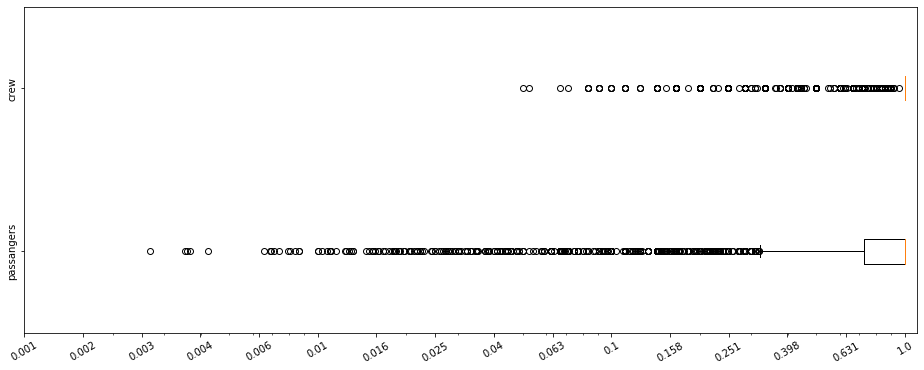

In [51]:
plot_hboxplot(df[['deathrate_p', 'deathrate_c']], labels=['passangers','crew'])

###### Fatalities distributions

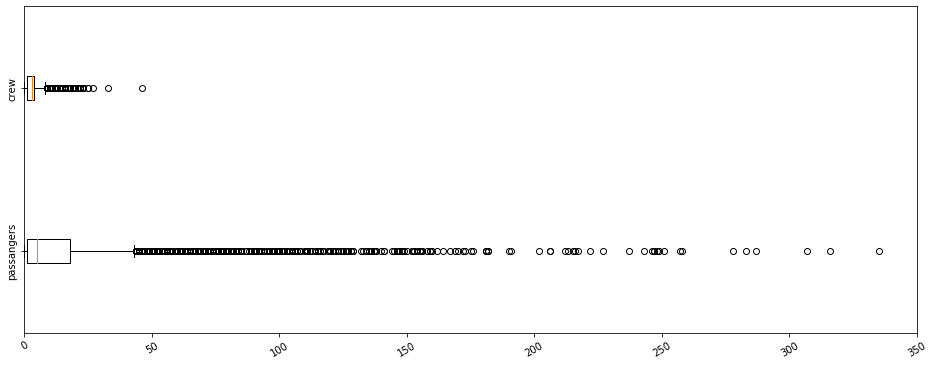

In [52]:
plot_hboxplot(df[['fatalities_p', 'fatalities_c']], labels=['passangers','crew'], log=False, xscale=(0, 350))

###### What is the maximum total fatalities count?

In [53]:
df.loc[df['total_losses'].idxmax(), :]

date                                                2001-09-11 00:00:00
crash_time                                                     08:47:00
from                                                             Boston
to                                                          Los Angeles
location                                        New York City, New York
operator                                              American Airlines
plane_manufacturer                                               boeing
summary               The aircraft was hijacked shortly after it lef...
aboard_c                                                             11
aboard_p                                                             81
fatalities_c                                                         11
fatalities_p                                                         81
fatalities_g                                                       2750
losses_on_airplane                                              

In [54]:
df.loc[df['total_losses'].idxmax(), 'summary']

'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.'

###### What is the maximum total fatalities count without ground losses?

In [55]:
df.loc[df['losses_on_airplane'].idxmax(), :]

date                                                1977-03-27 00:00:00
crash_time                                                     17:07:00
from                                                           Tenerife
to                                                           Las Palmas
location                                       Tenerife, Canary Islands
operator                               Pan American World Airways / KLM
plane_manufacturer                                               boeing
summary               Both aircraft were diverted to Tenerife becaus...
aboard_c                                                             30
aboard_p                                                            614
fatalities_c                                                         23
fatalities_p                                                        560
fatalities_g                                                          0
losses_on_airplane                                              

In [56]:
df.loc[df['losses_on_airplane'].idxmax(), 'summary']

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety officer and for some months had  been training other pilots using a simulator, where getting takeoff permission was not simulated. The Pan Am aircraft was named Clipper 

###### What operators have killed most people? (without ground fatalities)

In [60]:
df.groupby('operator')['losses_on_airplane']\
.agg([len, sum])\
.rename(columns={'len': 'incidents', 'sum': 'total_fatalities'})\
.nlargest(10, columns='total_fatalities')

,incidents,total_fatalities
operator,,
Aeroflot,260.0,8512.0
Military - U.S. Air Force,177.0,3201.0
Air France,72.0,1691.0
American Airlines,37.0,1422.0
Pan American World Airways,41.0,1261.0
United Air Lines,44.0,1019.0
Military - U.S. Army Air Forces,43.0,986.0
AVIANCA,24.0,941.0
Turkish Airlines (THY),14.0,891.0


Lets explore **Aeroflot** incidents:

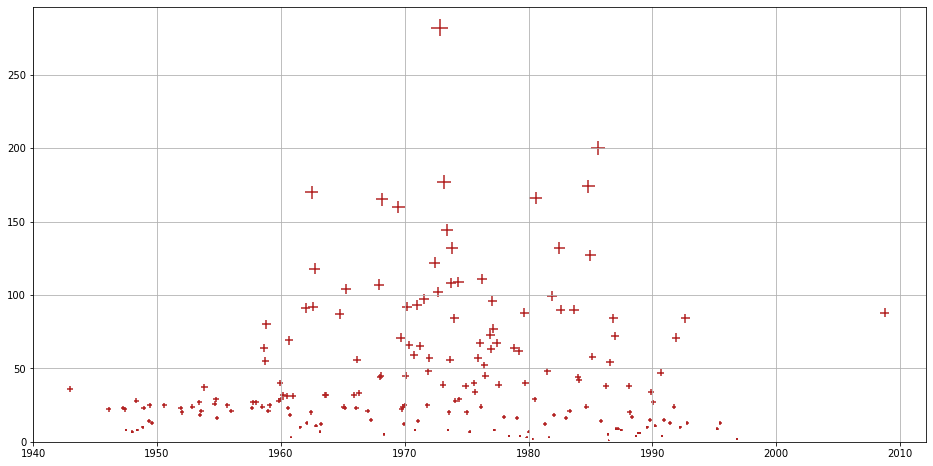

In [82]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


plt.figure(figsize=(16,8))
data = df.loc[df.operator == 'Aeroflot', :].resample(rule='M', on='date').sum()
plt.scatter(x=data.index, y=data.losses_on_airplane, marker='+', s=data.losses_on_airplane, color='firebrick')
plt.grid()
plt.ylim(0,)
plt.xlim(pd.datetime(1940,1,1))
plt.show()

We can see that most of the aircrashes occured before 1992, i.e. before colapse of USSR, when Aeroflot was a monopoly that served more than 300M people. So it is unfair to compare this company with aircompanies from other countries with high competition.

###### So now we focus on planecrashes after 1992 (without ground fatalities)

In [68]:
df.loc[df['date'] > pd.datetime(1992,1,1), :].groupby('operator')['losses_on_airplane']\
.agg([len, sum])\
.rename(columns={'len': 'incidents', 'sum': 'total_fatalities'})\
.nlargest(20, columns='total_fatalities')

,incidents,total_fatalities
operator,,
China Airlines (Taiwan),4.0,688.0
American Airlines,6.0,588.0
Malaysia Airlines,3.0,571.0
Military - Russian Air Force,11.0,426.0
Air France,5.0,393.0
Saudi Arabian Airlines / Kazakhstan Airlines,1.0,349.0
EgyptAir,3.0,297.0
TAM (Brazil),4.0,284.0
Kenya Airways,2.0,283.0


###### Who was the manufacturer of the most planes that crashed?

In [71]:
top_10_manufacturers = df.groupby('plane_manufacturer')['losses_on_airplane']\
.agg([len, sum])\
.rename(columns={'len': 'incidents', 'sum': 'total_fatalities'})\
.nlargest(10, columns='incidents')

top_10_manufacturers

,incidents,total_fatalities
plane_manufacturer,,
douglas,1013.0,15614.0
boeing,407.0,19662.0
lockheed,362.0,7325.0
de havilland,321.0,2970.0
cessna,318.0,1296.0
antonov,289.0,5528.0
ilyushin,145.0,5825.0
fokker,139.0,2690.0
piper,138.0,581.0


Lets build the graph showing when each manufacturer loss each plane and how many fatalities it caused

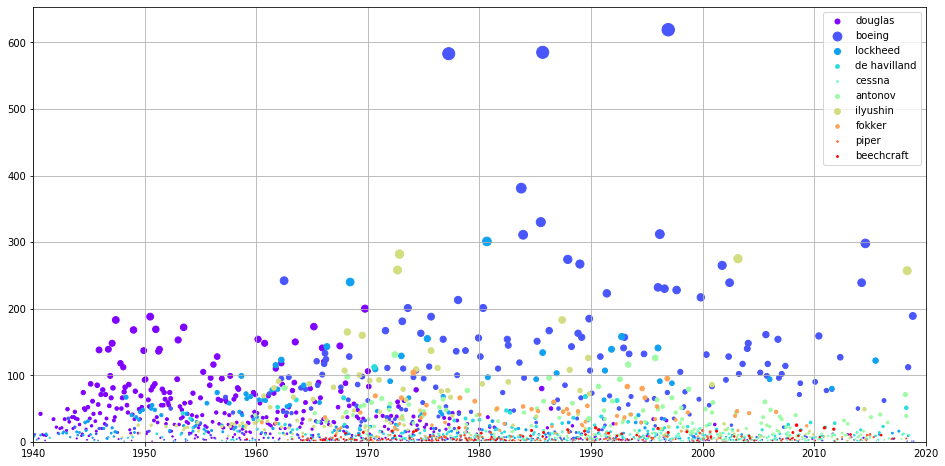

In [83]:
import matplotlib.cm as cm


colors = cm.rainbow(np.linspace(0, 1, 10))
man_names = top_10_manufacturers.index.tolist()


plt.figure(figsize=(16,8))

for m, c in zip(man_names, colors):
    data = df[df['plane_manufacturer'] == m].resample(rule='M', on='date').sum()
    plt.scatter(x=data.index, y=data.losses_on_airplane, marker='.', s=data.losses_on_airplane, color=c, label=m)

plt.grid()
plt.ylim(0,)
plt.legend()
plt.xlim(pd.datetime(1940,1,1), pd.datetime(2020,1,1))
plt.show()

In [84]:
df.head()

,date,crash_time,from,to,location,operator,plane_manufacturer,summary,aboard_c,aboard_p,fatalities_c,fatalities_p,fatalities_g,losses_on_airplane,total_losses,deathrate_c,deathrate_p
0,1908-09-17,17:18:00,NaN,NaN,"Fort Myer, Virginia",Military - U.S. Army,wright,"During a demonstration flight, a U.S. Army fly...",1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
1,1909-09-07,NaN,NaN,NaN,"Juvisy-sur-Orge, France",NaN,wright,Eugene Lefebvre was the first pilot to ever be...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1912-07-12,06:30:00,NaN,NaN,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,First U.S. dirigible Akron exploded just offsh...,5.0,0.0,5.0,0.0,0.0,5.0,5.0,1.0,NaN
3,1913-08-06,NaN,NaN,NaN,"Victoria, British Columbia, Canada",Private,curtiss,The first fatal airplane accident in Canada oc...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN
4,1913-09-09,18:30:00,NaN,NaN,Over the North Sea,Military - German Navy,zeppelin,The airship flew into a thunderstorm and encou...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [203]:
def resample_time(t):
    try:
        return t.hour*60 + t.minute
    except AttributeError:
        return np.nan

In [204]:
df['time'] = df.crash_time.apply(resample_time)

In [220]:
time_marks2 = np.arange(25) * 60

In [221]:
time_marks = np.arange(25, dtype='uint16') * 100

In [199]:
time_marks = np.repeat(np.arange(24),2) * 100 + (np.array([0,30]) * np.ones((24,1))).ravel()
time_marks = time_marks.astype('uint16')
print(time_marks)

[   0   30  100  130  200  230  300  330  400  430  500  530  600  630
  700  730  800  830  900  930 1000 1030 1100 1130 1200 1230 1300 1330
 1400 1430 1500 1530 1600 1630 1700 1730 1800 1830 1900 1930 2000 2030
 2100 2130 2200 2230 2300 2330]


In [225]:
time_labels = time_marks.astype('str').tolist()
time_labels = [t.rjust(4,'0') for t in time_labels]
time_labels = [f"{t[:2]}:{t[2:]}" for t in time_labels]
print(time_labels)

['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00']


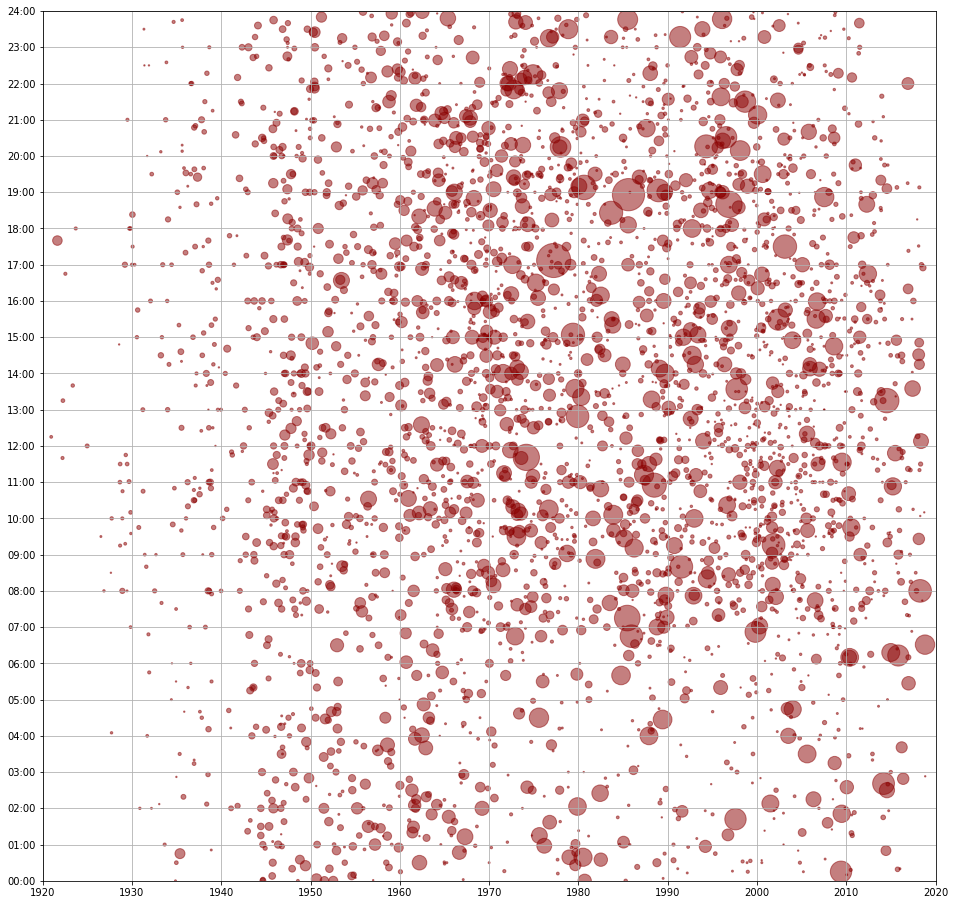

In [229]:
fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(df.date, df.time, s=df.losses_on_airplane * 2, color='darkred', alpha=0.5)
ax.set(yticks=time_marks2, yticklabels=time_labels, ylim=(0, 60*24), xlim=(pd.datetime(1920,1,1), pd.datetime(2020,1,1)))
ax.grid()